# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """
    Build your own model
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [7]:
## 超參數設定
"""
Set your required experiment parameters
"""
#LEARNING_RATE = 1e-2
EPOCHS = 30
BATCH_SIZE = 256

In [8]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for mType in  range(4):
    keras.backend.clear_session() # 把舊的 Graph 清掉
        
    print("Experiment with LR = %.6f" % (mType))
    model = build_mlp(input_shape=x_train.shape[1:])
    #model.summary()
    
    
    if(mType==0):
        optName = 'sgde2'
        lr = 1e-2
        myopt = keras.optimizers.SGD(lr=lr, momentum=0.0, decay=0.0, nesterov=False) 
    elif(mType==1):
        optName = 'adam2'
        lr = 1e-2
        myopt = keras.optimizers.Adam(lr=lr, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    else:
        optName = 'adam3'
        lr = 1e-3
        myopt = keras.optimizers.Adam(lr=lr, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    
    optimizer = myopt

    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = optName
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


W0804 02:01:47.314549  4644 deprecation_wrapper.py:119] From C:\Users\Win7\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0804 02:01:47.335550  4644 deprecation_wrapper.py:119] From C:\Users\Win7\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0804 02:01:47.533562  4644 deprecation_wrapper.py:119] From C:\Users\Win7\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0804 02:01:47.537562  4644 deprecation_wrapper.py:119] From C:\Users\Win7\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0804 02:01:47.564563  4644 depr

Experiment with LR = 0.000000


W0804 02:01:47.909583  4644 deprecation.py:323] From C:\Users\Win7\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 10s 192us/step - loss: 2.0687 - acc: 0.2656 - val_loss: 1.9382 - val_acc: 0.3077
Epoch 2/30
50000/50000 [==============================] - 8s 170us/step - loss: 1.8822 - acc: 0.3380 - val_loss: 1.8829 - val_acc: 0.3205
Epoch 3/30
50000/50000 [==============================] - 8s 166us/step - loss: 1.8227 - acc: 0.3569 - val_loss: 1.8073 - val_acc: 0.3542
Epoch 4/30
50000/50000 [==============================] - 8s 167us/step - loss: 1.7713 - acc: 0.3765 - val_loss: 1.7993 - val_acc: 0.3615
Epoch 5/30
50000/50000 [==============================] - 8s 169us/step - loss: 1.7372 - acc: 0.3880 - val_loss: 1.7449 - val_acc: 0.3798
Epoch 6/30
50000/50000 [==============================] - 8s 166us/step - loss: 1.7060 - acc: 0.3986 - val_loss: 1.6994 - val_acc: 0.4034
Epoch 7/30
50000/50000 [==============================] - 8s 167us/step - loss: 1.6814 - acc: 0.4088 - val_loss: 1.6754 -

50000/50000 [==============================] - 13s 264us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 29/30
50000/50000 [==============================] - 13s 262us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 30/30
50000/50000 [==============================] - 13s 266us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Experiment with LR = 2.000000
Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 12s 233us/step - loss: 1.9166 - acc: 0.3059 - val_loss: 1.7857 - val_acc: 0.3632
Epoch 2/30
50000/50000 [==============================] - 10s 201us/step - loss: 1.7084 - acc: 0.3887 - val_loss: 1.6440 - val_acc: 0.4063
Epoch 3/30
50000/50000 [==============================] - 10s 204us/step - loss: 1.6160 - acc: 0.4247 - val_loss: 1.5651 - val_acc: 0.4423
Epoch 4/30
50000/50000 [==============================] - 10s 207us/step - loss: 1.5501 -

50000/50000 [==============================] - 11s 218us/step - loss: 1.0229 - acc: 0.6361 - val_loss: 1.3801 - val_acc: 0.5238
Epoch 26/30
50000/50000 [==============================] - 11s 214us/step - loss: 1.0175 - acc: 0.6375 - val_loss: 1.4147 - val_acc: 0.5175
Epoch 27/30
50000/50000 [==============================] - 11s 213us/step - loss: 0.9938 - acc: 0.6464 - val_loss: 1.3917 - val_acc: 0.5331
Epoch 28/30
50000/50000 [==============================] - 11s 215us/step - loss: 0.9797 - acc: 0.6508 - val_loss: 1.4094 - val_acc: 0.5290
Epoch 29/30
50000/50000 [==============================] - 11s 211us/step - loss: 0.9540 - acc: 0.6607 - val_loss: 1.4500 - val_acc: 0.5203
Epoch 30/30
50000/50000 [==============================] - 11s 211us/step - loss: 0.9374 - acc: 0.6676 - val_loss: 1.4256 - val_acc: 0.5286


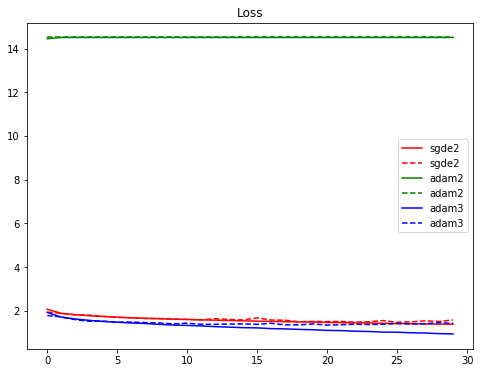

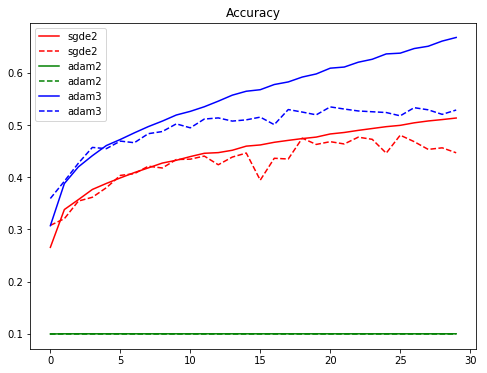

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b" ]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()